In [1]:
##This is an analysis of the impacts that various statistical categories have on winning 
#in the NFL. I used a dataset comprised of all NFL team statistics from 2003-2023.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
#Read in data from the NFL statistics CSV file
file_path = 'Datasets/team_stats_2003_2023.csv'
df = pd.read_csv(file_path)

In [4]:
#Extrapolate each year to use in yearly analyis among teams.
#Also converting the columns names in the dataset to a list to use for inserts later
years = df['year'].unique()
df_columns = df.columns.tolist()

In [5]:
#Initializing empty lists we will use later for inserting into
max_pass_data = []
min_pass_data = []
max_rush_data = []
min_rush_data = []
max_points_data = []
min_points_data = []
max_points_allowed_rank_data = []
min_points_allowed_rank_data = []
max_wins_data = []
min_wins_data = []
max_wins_cat_percentage_data = []
final_data = []

In [6]:
#Creating columns that we will use for each dataframe we are creating off of the main dataset
max_min_rank_columns = ['Year', 'Pass yds', 'Pass yds Rank', 'Rush yds', 'Rush yds Rank','Points','Points Rank','Points allowed','Points allowed Rank', 'Team', 'Wins', 'Wins Rank']
max_wins_cat_percentage_columns = ['Category', 'Percentage the highest winning team is the top ranked','Percentage the highest winning team is in ranked in top 5']
final_max_min_rank_columns = ['yearly_pass_yds_rank', 'yearly_rush_yds_rank', 'yearly_wins_rank','yearly_points_rank','yearly_points_allowed_rank']
final_columns = df_columns.append(final_max_min_rank_columns)

In [7]:
#creating dataframes for each of the below, that we will insert into later:
    #dfmaxpass - For each year, the team with the most passing yards
    #dfminpass - For each year, the team with the least passing yards
    #dfmaxrush - For each year, the team with the most rush yards
    #dfminrush - For each year, the team with the least rush yards
    #dfmaxpoints - For each year, the team with the most points
    #dfminpoints - For each year, the team with the least points
    #dfmaxpointsallowedrank - For each year, the team that allowed the LEAST amount of points
    #dfminpointsallowedrank - For each year, the team that allowed the MOST amount of points
    #dfmaxwins - For each year, the team with the most amount of wins
    #dfminwins - For each year, the team with the least amount of wins
    #dfmaxwinscatpercentage - From 2003-2023, the percentage that the team with the most wins was
        #in the top 5 for the year for each category.

dfmaxpass = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfminpass = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfmaxrush = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfminrush = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfmaxpoints = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfminpoints = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfmaxpointsallowedrank = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfminpointsallowedrank = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfmaxwins = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfminwins = pd.DataFrame(columns=max_min_rank_columns, dtype=object)
dfmaxwinscatpercentage = pd.DataFrame(columns=max_wins_cat_percentage_columns, dtype=object)

In [8]:
#Creating a new dataframe off of the original dataset that includes each teams ranking for each
    #category in each year.
    
final_df = pd.DataFrame(columns=final_columns, dtype=object)

for x in years:
# Filter for the specified year
    df_filtered = df[df['year'] == x]

    df_filtered['yearly_pass_yds_rank'] = df_filtered['pass_yds'].rank(method='min', ascending=False).astype(int)
    df_filtered['yearly_rush_yds_rank'] = df_filtered['rush_yds'].rank(method='min', ascending=False).astype(int)
    df_filtered['yearly_wins_rank'] = (df_filtered.sort_values(['wins','points']).groupby(['year']).cumcount(ascending=False)+1) #using this method to resolve ties based on points scored
    df_filtered['yearly_points_rank'] = df_filtered['points'].rank(method='min', ascending=False).astype(int)
    df_filtered['yearly_points_allowed_rank'] = df_filtered['points_opp'].rank(method='min', ascending=True).astype(int)

    for index, row in df_filtered.iterrows():
        final_data.append(row)

final_df = pd.DataFrame(final_data)
final_df.head()


,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,yearly_pass_yds_rank,yearly_rush_yds_rank,yearly_wins_rank,yearly_points_rank,yearly_points_allowed_rank
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,26,27.9,11.3,-136.51,NaN,9,27,1,12,1
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,22,28.1,17.2,-177.92,NaN,26,17,12,17,3
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,22,21.9,17.6,-230.07,NaN,28,21,22,30,5
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,15,32.4,11.8,-107.89,NaN,13,25,21,23,8
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,23,31.8,16.6,-220.50,NaN,32,1,10,8,6


In [9]:
#Gathering the best and worst teams in each category for each year and appending initialized lists
    #with the corresponding data
    
for x in years:
# Filter for the specified year
    df_filtered = final_df[final_df['year'] == x]
    
# Get the maximum value for the specified year. Using min, as they are ranked in that way
    max_value = df_filtered['yearly_pass_yds_rank'].min()

# Get the rows with the maximum value
    max_pass_yds = df_filtered[df_filtered['yearly_pass_yds_rank'] == max_value]

    for index, row in max_pass_yds.iterrows():
        max_pass_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        max_pass_data.append(max_pass_year_row)

# Get the minimum value for the specified year. Using max, as they are ranked in that way
    min_value = df_filtered['yearly_pass_yds_rank'].max()

# Get the rows with the minimum value
    min_pass_yds = df_filtered[df_filtered['yearly_pass_yds_rank'] == min_value]

    for index, row in min_pass_yds.iterrows():
        min_pass_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        min_pass_data.append(min_pass_year_row)

# Get the maximum value for the specified year. Using min, as they are ranked in that way
    max_value = df_filtered['yearly_rush_yds_rank'].min()

# Get the rows with the maximum value
    max_rush_yds = df_filtered[df_filtered['yearly_rush_yds_rank'] == max_value]

    for index, row in max_rush_yds.iterrows():
        max_rush_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        max_rush_data.append(max_rush_year_row)

# Get the minimum value for the specified year. Using max, as they are ranked in that way
    min_value = df_filtered['yearly_rush_yds_rank'].max()

# Get the rows with the maximum value
    min_rush_yds = df_filtered[df_filtered['yearly_rush_yds_rank'] == min_value]

    for index, row in min_rush_yds.iterrows():
        min_rush_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        min_rush_data.append(min_rush_year_row)

# Get the maximum value for the specified year. Using min, as they are ranked in that way
    max_value = df_filtered['yearly_points_rank'].min()

# Get the rows with the maximum value
    max_points = df_filtered[df_filtered['yearly_points_rank'] == max_value]

    for index, row in max_points.iterrows():
        max_points_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        max_points_data.append(max_points_year_row)

# Get the minimum value for the specified year. Using max, as they are ranked in that way
    min_value = df_filtered['yearly_points_rank'].max()

# Get the rows with the minimum value
    min_points = df_filtered[df_filtered['yearly_points_rank'] == min_value]

    for index, row in min_points.iterrows():
        min_points_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        min_points_data.append(min_points_year_row)

# Get the maximum value for the specified year. Using min, as they are ranked in that way
    max_value = df_filtered['yearly_points_allowed_rank'].min()

# Get the rows with the maximum value
    max_rank_points_allowed = df_filtered[df_filtered['yearly_points_allowed_rank'] == max_value]

    for index, row in max_rank_points_allowed.iterrows():
        max_points_allowed_rank_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        max_points_allowed_rank_data.append(max_points_allowed_rank_year_row)

# Get the minimum value for the specified year. Using max, as they are ranked in that way
    min_value = df_filtered['yearly_points_allowed_rank'].max()

# Get the rows with the maximum value
    min_rank_points_allowed = df_filtered[df_filtered['yearly_points_allowed_rank'] == min_value]

    for index, row in min_rank_points_allowed.iterrows():
        min_points_allowed_rank_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        min_points_allowed_rank_data.append(min_points_allowed_rank_year_row)

# Get the maximum value for the specified year. Using min, as they are ranked in that way
    max_value = df_filtered['yearly_wins_rank'].min()

# Get the rows with the maximum value
    max_wins = df_filtered[df_filtered['yearly_wins_rank'] == max_value]

    for index, row in max_wins.iterrows():
        max_wins_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        max_wins_data.append(max_wins_year_row)

# Get the minimum value for the specified year. Using max, as they are ranked in that way
    min_value = df_filtered['yearly_wins_rank'].max()

# Get the rows with the minimum value
    min_wins = df_filtered[df_filtered['yearly_wins_rank'] == min_value]

    for index, row in min_wins.iterrows():
        min_wins_year_row = {'Year':row['year'],'Rush yds':row['rush_yds'],'Rush yds Rank':row['yearly_rush_yds_rank'],'Pass yds':row['pass_yds'],'Pass yds Rank':row['yearly_pass_yds_rank'],'Points':row['points'],'Points Rank':row['yearly_points_rank'],'Points allowed':row['points_opp'],'Points allowed Rank':row['yearly_points_allowed_rank'],'Team':row['team'],'Wins':row['wins'],'Wins Rank':row['yearly_wins_rank']}
        min_wins_data.append(min_wins_year_row)

In [10]:
#Creating dataframes with the lists created above

#dfmaxpass - For each year, the team with the most passing yards
dfmaxpass = pd.DataFrame(max_pass_data)
dfmaxpass.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1695,19,4179,1,447,2,336,20,Indianapolis Colts,12,4
1,2004,1852,15,4623,1,522,1,351,19,Indianapolis Colts,12,4
2,2005,1138,32,4437,1,311,17,387,26,Arizona Cardinals,5,23
3,2006,1761,19,4503,1,413,5,322,13,New Orleans Saints,10,6
4,2007,1849,13,4731,1,589,1,274,4,New England Patriots,16,1


In [11]:
#dfminpass - For each year, the team with the least passing yards
dfminpass = pd.DataFrame(min_pass_data)
dfminpass.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,2674,1,2255,32,391,8,281,6,Baltimore Ravens,10,10
1,2004,1624,25,2192,32,231,32,331,13,Chicago Bears,5,29
2,2005,1689,17,1898,32,239,30,428,30,San Francisco 49ers,4,30
3,2006,2939,1,2371,32,292,25,328,15,Atlanta Falcons,7,23
4,2007,1477,27,2320,32,219,32,364,20,San Francisco 49ers,5,26


In [12]:
#dfmaxrush - For each year, the team with the most rush yards
dfmaxrush = pd.DataFrame(max_rush_data)
dfmaxrush.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,2674,1,2255,32,391,8,281,6,Baltimore Ravens,10,10
1,2004,2672,1,2412,30,340,16,337,14,Atlanta Falcons,11,6
2,2005,2546,1,2679,27,351,14,341,18,Atlanta Falcons,8,18
3,2006,2939,1,2371,32,292,25,328,15,Atlanta Falcons,7,23
4,2007,2634,1,2745,28,365,15,311,12,Minnesota Vikings,8,16


In [13]:
#dfminrush - For each year, the team with the least rush yards
dfminrush = pd.DataFrame(min_rush_data)
dfminrush.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1338,32,2924,24,270,26,379,25,Detroit Lions,5,26
1,2004,1295,32,3858,8,320,18,442,31,Oakland Raiders,5,27
2,2005,1138,32,4437,1,311,17,387,26,Arizona Cardinals,5,23
3,2006,1129,32,3820,7,305,21,398,30,Detroit Lions,3,31
4,2007,1248,32,3181,20,226,31,335,14,Kansas City Chiefs,4,30


In [14]:
#dfmaxpoints - For each year, the team with the most points
dfmaxpoints = pd.DataFrame(max_points_data)
dfmaxpoints.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1929,15,3981,2,484,1,332,19,Kansas City Chiefs,13,2
1,2004,1852,15,4623,1,522,1,351,19,Indianapolis Colts,12,4
2,2005,2457,3,3458,13,452,1,271,7,Seattle Seahawks,13,2
3,2006,2578,2,3262,16,492,1,303,7,San Diego Chargers,14,1
4,2007,1849,13,4731,1,589,1,274,4,New England Patriots,16,1


In [15]:
#dfminpoints - For each year, the team with the least points
dfminpoints = pd.DataFrame(min_points_data)
dfminpoints.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1531,29,2959,23,225,32,452,32,Arizona Cardinals,4,32
1,2004,1624,25,2192,32,231,32,331,13,Chicago Bears,5,29
2,2005,1503,25,3047,23,232,32,301,11,Cleveland Browns,6,22
3,2006,1519,29,2420,31,168,32,332,18,Oakland Raiders,2,32
4,2007,1477,27,2320,32,219,32,364,20,San Francisco 49ers,5,26


In [16]:
#dfmaxpointsallowedrank - For each year, the team that allowed the LEAST amount of points
dfmaxpointsallowedrank = pd.DataFrame(max_points_allowed_rank_data)
dfmaxpointsallowedrank.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1607,27,3432,9,348,12,238,1,New England Patriots,14,1
1,2004,2464,2,2720,28,372,11,251,1,Pittsburgh Steelers,15,1
2,2005,2099,8,2002,31,260,26,202,1,Chicago Bears,11,10
3,2006,1637,25,3435,11,353,12,201,1,Baltimore Ravens,13,3
4,2007,1706,18,4033,6,450,3,262,1,Indianapolis Colts,13,3


In [17]:
#dfminpointsallowedrank - For each year, the team that allowed the MOST amount of points
dfminpointsallowedrank = pd.DataFrame(min_points_allowed_rank_data)
dfminpointsallowedrank.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1531,29,2959,23,225,32,452,32,Arizona Cardinals,4,32
1,2004,1449,30,3136,20,259,30,452,32,San Francisco 49ers,2,32
2,2005,1816,15,2237,30,260,26,431,32,Houston Texans,2,32
3,2006,2172,6,2688,29,298,24,412,32,San Francisco 49ers,7,22
4,2007,1288,31,3878,9,346,16,444,32,Detroit Lions,7,20


In [18]:
#dfmaxwins - For each year, the team with the most amount of wins
dfmaxwins = pd.DataFrame(max_wins_data)
dfmaxwins.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1607,27,3432,9,348,12,238,1,New England Patriots,14,1
1,2004,2464,2,2720,28,372,11,251,1,Pittsburgh Steelers,15,1
2,2005,1703,16,4096,3,439,2,247,2,Indianapolis Colts,14,1
3,2006,2578,2,3262,16,492,1,303,7,San Diego Chargers,14,1
4,2007,1849,13,4731,1,589,1,274,4,New England Patriots,16,1


In [19]:
#dfminwins - For each year, the team with the least amount of wins
dfminwins = pd.DataFrame(min_wins_data)
dfminwins.head()

,Year,Rush yds,Rush yds Rank,Pass yds,Pass yds Rank,Points,Points Rank,Points allowed,Points allowed Rank,Team,Wins,Wins Rank
0,2003,1531,29,2959,23,225,32,452,32,Arizona Cardinals,4,32
1,2004,1449,30,3136,20,259,30,452,32,San Francisco 49ers,2,32
2,2005,1816,15,2237,30,260,26,431,32,Houston Texans,2,32
3,2006,1519,29,2420,31,168,32,332,18,Oakland Raiders,2,32
4,2007,1569,23,3031,24,267,26,437,30,Miami Dolphins,1,32


In [20]:
#Re-formatting (inverting) the team rankings in order to plot them later
dfmaxwins['Rush yds Rank for plot', 'Pass yds Rank for plot', 'Points Rank for plot', 'Points allowed Rank for plot'] = 0

for index, row in dfmaxwins.iterrows():
    if row['Rush yds Rank'] == 32 or row['Rush yds Rank'] == 1:
        dfmaxwins.at[index, 'Rush yds Rank for plot'] = 33 - row['Rush yds Rank']
    else:
        dfmaxwins.at[index, 'Rush yds Rank for plot'] = 32 - row['Rush yds Rank']

    if row['Pass yds Rank'] == 32 or row['Pass yds Rank'] == 1:
        dfmaxwins.at[index, 'Pass yds Rank for plot'] = 33 - row['Pass yds Rank']
    else:
        dfmaxwins.at[index, 'Pass yds Rank for plot'] = 32 - row['Pass yds Rank']

    if row['Points Rank'] == 32 or row['Points Rank'] == 1:
        dfmaxwins.at[index, 'Points Rank for plot'] = 33 - row['Points Rank']
    else:
        dfmaxwins.at[index, 'Points Rank for plot'] = 32 - row['Points Rank']

    if row['Points allowed Rank'] == 32 or row['Points allowed Rank'] == 1:
        dfmaxwins.at[index, 'Points allowed Rank for plot'] = 33 - row['Points allowed Rank']
    else:
        dfmaxwins.at[index, 'Points allowed Rank for plot'] = 32 - row['Points allowed Rank']

In [21]:
#Merging year and team for plotting later
dfmaxwins['Year_Team Combined'] = dfmaxwins['Year'].astype(str) + '\n' + dfmaxwins['Team'].str.split().str[-1]

In [22]:
#Begin work on calculation and storing the percentage of winning teams that were in the top 5
    #of each category

top_1_rush_for_winners = 0
top_1_pass_for_winners = 0
top_1_points_for_winners = 0
top_1_points_allowed_for_winners = 0
    
top_5_rush_for_winners = 0
top_5_pass_for_winners = 0
top_5_points_for_winners = 0
top_5_points_allowed_for_winners = 0


for index, row in dfmaxwins.iterrows():
    if row['Rush yds Rank'] == 1:
        top_1_rush_for_winners += 1
    if row['Pass yds Rank'] == 1:
        top_1_pass_for_winners += 1
    if row['Points Rank'] == 1:
        top_1_points_for_winners += 1
    if row['Points allowed Rank'] == 1:
        top_1_points_allowed_for_winners += 1

    if row['Rush yds Rank'] <= 5:
        top_5_rush_for_winners += 1
    if row['Pass yds Rank'] <= 5:
        top_5_pass_for_winners += 1
    if row['Points Rank'] <= 5:
        top_5_points_for_winners += 1
    if row['Points allowed Rank'] <= 5:
        top_5_points_allowed_for_winners += 1

max_winners_length = len(dfmaxwins)

top_1_rush_for_winners = (top_1_rush_for_winners/max_winners_length) * 100
top_1_pass_for_winners = (top_1_pass_for_winners/max_winners_length) * 100
top_1_points_for_winners= (top_1_points_for_winners/max_winners_length) * 100
top_1_points_allowed_for_winners = (top_1_points_allowed_for_winners/max_winners_length) * 100

top_5_rush_for_winners = (top_5_rush_for_winners/max_winners_length) * 100
top_5_pass_for_winners = (top_5_pass_for_winners/max_winners_length) * 100
top_5_points_for_winners= (top_5_points_for_winners/max_winners_length) * 100
top_5_points_allowed_for_winners = (top_5_points_allowed_for_winners/max_winners_length) * 100

In [23]:
#Formatting rows for appending into the already initialized corresponding list, and then
    #the dataframe
    
top_5_rush_for_winners_row = {'Category':'Rush Rank','Percentage the highest winning team is the top ranked':top_1_rush_for_winners,'Percentage the highest winning team is in ranked in top 5':top_5_rush_for_winners}
top_5_pass_for_winners_row = {'Category':'Pass Rank','Percentage the highest winning team is the top ranked':top_1_pass_for_winners,'Percentage the highest winning team is in ranked in top 5':top_5_pass_for_winners}
top_5_points_for_winners_row = {'Category':'Points Rank','Percentage the highest winning team is the top ranked':top_1_points_for_winners,'Percentage the highest winning team is in ranked in top 5':top_5_points_for_winners}
top_5_points_allowed_for_winners_row = {'Category':'Points allowed Rank','Percentage the highest winning team is the top ranked':top_1_points_allowed_for_winners,'Percentage the highest winning team is in ranked in top 5':top_5_points_allowed_for_winners}

max_wins_cat_percentage_data.append(top_5_rush_for_winners_row)
max_wins_cat_percentage_data.append(top_5_pass_for_winners_row)
max_wins_cat_percentage_data.append(top_5_points_for_winners_row)
max_wins_cat_percentage_data.append(top_5_points_allowed_for_winners_row)

dfmaxwinscatpercentage = pd.DataFrame(max_wins_cat_percentage_data)
dfmaxwinscatpercentage

,Category,Percentage the highest winning team is the top ranked,Percentage the highest winning team is in ranked in top 5
0,Rush Rank,9.523810,28.571429
1,Pass Rank,23.809524,57.142857
2,Points Rank,42.857143,76.190476
3,Points allowed Rank,19.047619,52.380952


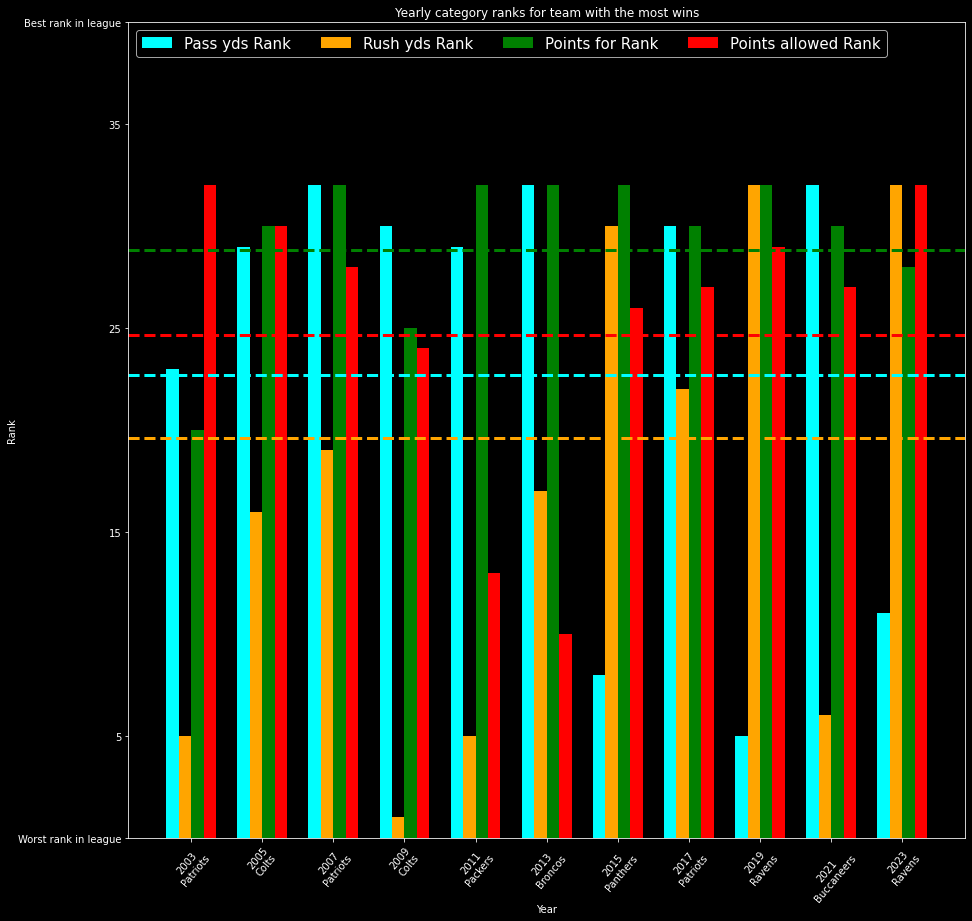

In [24]:
plt.style.use('dark_background')
#Creating figure and subplots
fig, ax = plt.subplots(figsize=(15, 15))
#Initializing the y ticks for the first subplot
y_ticks_0 = (0, 5, 15, 25, 35, 40)
width = 0.35

#Creating a grouped bar chart for each year
#Filtering for odd years to make the plot more readable
dfmaxwinsodd = dfmaxwins[dfmaxwins['Year'] % 2 == 1]
ax.bar(dfmaxwinsodd['Year']-0.525, dfmaxwinsodd['Pass yds Rank for plot'], width, color='cyan') 
ax.bar(dfmaxwinsodd['Year']-0.175, dfmaxwinsodd['Rush yds Rank for plot'], width, color='orange') 
ax.bar(dfmaxwinsodd['Year']+0.175, dfmaxwinsodd['Points Rank for plot'], width, color='green')
ax.bar(dfmaxwinsodd['Year']+0.525, dfmaxwinsodd['Points allowed Rank for plot'], width, color='red')
ax.legend(["Pass yds Rank", "Rush yds Rank", "Points for Rank", "Points allowed Rank"],loc="upper left", ncol=4,fontsize=15)

#Adding average line for each category
#Using the unfiltered df to  get average across odd AND even years
ax.axhline(y=np.nanmean(dfmaxwins['Pass yds Rank for plot']), color = 'cyan', linestyle = '--', linewidth = 3)
ax.axhline(y=np.nanmean(dfmaxwins['Rush yds Rank for plot']), color = 'orange', linestyle = '--', linewidth = 3)
ax.axhline(y=np.nanmean(dfmaxwins['Points Rank for plot']), color = 'green', linestyle = '--', linewidth = 3)
ax.axhline(y=np.nanmean(dfmaxwins['Points allowed Rank for plot']), color = 'red', linestyle = '--', linewidth = 3)

ax.set_xticks(dfmaxwinsodd['Year'])
ax.set_xticklabels(dfmaxwinsodd['Year_Team Combined'], rotation=50)
ax.set_yticks(y_ticks_0)
ax.set_yticklabels(['Worst rank in league', '5', '15', '25', '35', 'Best rank in league'])
ax.set_xlabel("Year", labelpad=.5)
ax.set_ylabel("Rank", labelpad = .5)
ax.title.set_text('Yearly category ranks for team with the most wins')

plt.subplots_adjust(hspace=0.5)
plt.show()

##On the x-axis, I have plotted each team that had the best win-loss record for that year
##On the y-axis, I have plotted that team's rank for each category for that year.
##I have also plotted an average line (dotted) for each category rank across all years.

##As we can see from the dotted line, on average, the team with the most points in a given year
#is the most accurate predictor for the teams with the most wins.

##Conversely, on average, the team with the most Rush Yards for the year is the least accurate 
#predictor for the team with the most wins for the year.

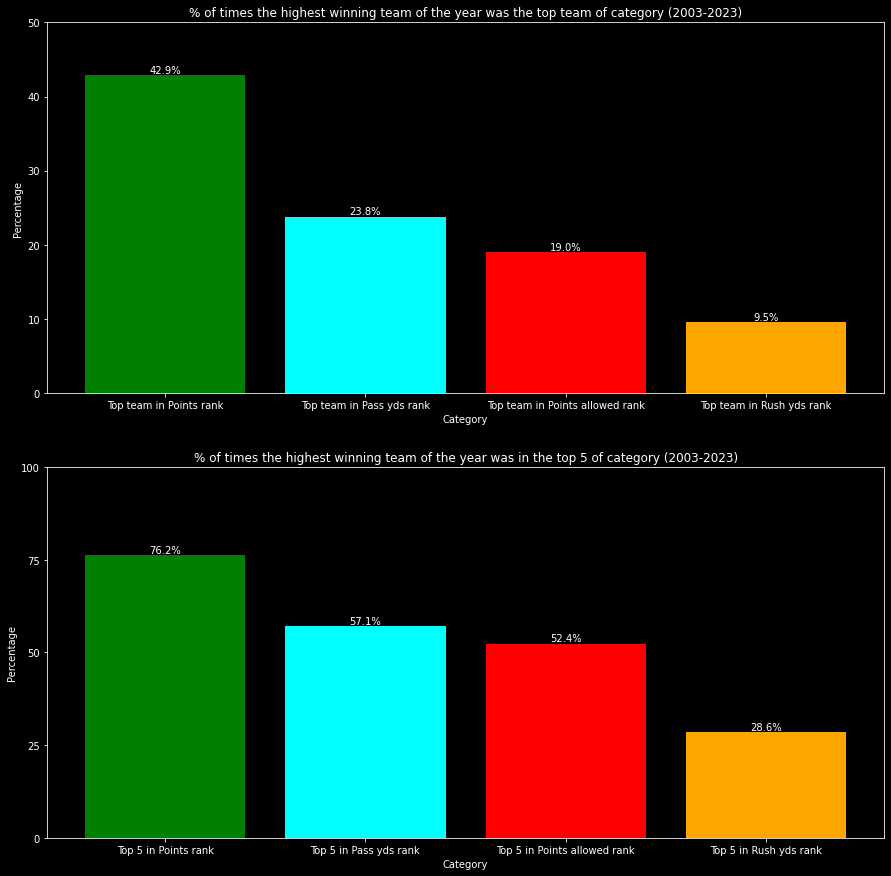

In [25]:
plt.style.use('dark_background')
#Creating figure and subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

#Creating a bar chart for top percentages for each category from 2003-2023
colors = ['green', 'cyan', 'red', 'orange']
y_ticks_1 = (0, 10, 20, 30, 40, 50)
#Sorting df from highest percentage to lowest for plotting purposes.
dfmaxwinscatpercentage = dfmaxwinscatpercentage.sort_values(by='Percentage the highest winning team is the top ranked',ascending=False)
bars = ax[0].bar(dfmaxwinscatpercentage['Category'], dfmaxwinscatpercentage['Percentage the highest winning team is the top ranked'],color=colors)
ax[0].set_yticks(y_ticks_1)
ax[0].set_yticklabels(['0','10','20','30','40','50'])
ax[0].set_ylabel("Percentage")
ax[0].set_xticklabels(['Top team in Points rank','Top team in Pass yds rank','Top team in Points allowed rank','Top team in Rush yds rank'])
ax[0].set_xlabel("Category")
ax[0].title.set_text('% of times the highest winning team of the year was the top team of category (2003-2023)')

#Creating percentage value labels for the top of each bar
for bar, percent in zip(bars, dfmaxwinscatpercentage['Percentage the highest winning team is the top ranked']):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.1f}%', ha='center', va='bottom')




#Creating a bar chart for top 5 percentages for each category from 2003-2023
colors = ['green', 'cyan', 'red', 'orange']
y_ticks_2 = (0, 25, 50, 75, 100)
#Sorting df from highest percentage to lowest for plotting purposes.
dfmaxwinscatpercentage = dfmaxwinscatpercentage.sort_values(by='Percentage the highest winning team is in ranked in top 5',ascending=False)
bars = ax[1].bar(dfmaxwinscatpercentage['Category'], dfmaxwinscatpercentage['Percentage the highest winning team is in ranked in top 5'],color=colors)
ax[1].set_yticks(y_ticks_2)
ax[1].set_yticklabels(['0','25','50','75','100'])
ax[1].set_ylabel("Percentage")
ax[1].set_xticklabels(['Top 5 in Points rank','Top 5 in Pass yds rank','Top 5 in Points allowed rank','Top 5 in Rush yds rank'])
ax[1].set_xlabel("Category")
ax[1].title.set_text('% of times the highest winning team of the year was in the top 5 of category (2003-2023)')

#Creating percentage value labels for the top of each bar
for bar, percent in zip(bars, dfmaxwinscatpercentage['Percentage the highest winning team is in ranked in top 5']):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

##The first chart below shows the % of times the highest winning team in a given year was also
#the highest ranked team in each category

##Similarly, the second chart shows the % of times the highest winning team in a given year 
#was ranked in the top 5 in each category

##The charts below show that almost 50% of the time, the team with the most wins in a year is 
#also the team that had the most points scored for that year. Over 75% of the time the team
#with the most wins is in the top 5 of points scored for that year. We can also see that
#only 9% of teams that had the most Rush Yards in a given year also had the most wins,
#and only 28% of teams that were in the top 5 of Rush Yards for a given year also had the
#most wins.

##The findings from these charts further support the findings from the grouped bar chart above,
#which is the amount of Points Scored is the most confident predictor to NFL Team success,
#and Rush Yards is the least confident predictor to NFL Team success.